# MCscan (Python version) to identify syntenic blocks - binderized

Everything should be working and all set to run the code below. No installations necessary. See [here](https://github.com/fomightez/mcscan-binder/blob/master/README.md#technical-details) about how that works.

-----

This notebook works through [the example workflow][1]. Follow that link to opeb the example and work alongside with it.

Click on each cell and press `shift-enter` or the run button to run each. Or use alternatives under `Cell` in the menu above this notebook.

You can get to the Jupyter Dashboard by clicking the the Jupyter logo in the upper left corner of this active notebook. There you can see the files in a typical GUI file handling interface. Or simply add a cell at any point and type `ls` to see a listing of the files in the current working directory.

Example Workflow
----------------

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

The [Example Workflow][1] at <https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)> begins with the command `!python2 -m jcvi.apps.fetch phytozome` but the files that fetches have already been put here. So continue with the next commands.  
(Technical reason:  Error when trying that command showed `ftp = FTP(o.netloc)` among the error traceback, and I know MyBinder doesn't allow FTP and so that explains why it won't work here.)

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [1]:
!python2 -m jcvi.formats.gff bed --type=mRNA --key=Name Vvinifera_145_gene.gff3.gz -o grape.bed

23:38:28 [base] Load file `Vvinifera_145_gene.gff3.gz`
23:38:44 [gff] Extracted 26346 features (type=mRNA id=Name)


In [2]:
!python2 -m jcvi.formats.gff bed --type=mRNA --key=Name Ppersica_139_gene.gff3.gz -o peach.bed

23:38:46 [base] Load file `Ppersica_139_gene.gff3.gz`
23:39:00 [gff] Extracted 28701 features (type=mRNA id=Name)


'Cleaning' the description lines of the coding sequences (FASTA format) is the next step. This is done to make concise identifiers that match those in the `.bed` file. ( I found matching is important or will get error that identifier not in `.bed` file when trying to run `jcvi.compara.catalog ortholog`.)

To follow what happens in the step, first the next cell will show the first few lines of one of the files before 'cleaning'.

In [3]:
!cp Vvinifera_145_cds.fa.gz Vv_cds.fa.gz
!gunzip Vv_cds.fa.gz
!head Vv_cds.fa

>GSVIVT01000001001|PACid:17816625
ATGGCTTTTGGGCGATTGCGATCGATTCACAATCTGTATCGAACGGCCGAGATTCGACCATTTTCATATCTGCTTGGAAG
CTCTAGAAGCTACTCGATTGTTACAATAAATGTTCCTAAAATTAATTGCTGGGCCACTTCTTACTTCTATAAGGGCCACA
ATGTTCTTCCCTGGACATGTCGAAGCACAATGACACTTCACTCTTCAATGCCTACTGAGCCATGGATCTTGTTGAATGAT
GCAAGGTTGCTAACTACAAGAGCGAAAGCCCCTGCCCAAGTTCGACAAATGGTATCCTATCCTTTCTTTTTGACTGATGG
CAAATATATTGCACTGCCACAAAGCAATTAA
>GSVIVT01000002001|PACid:17816626
ATGGGGTTCTTGGATGCCATACCAAATAAGCATTCACTCCAAGATTCATCCTCCTTTCTCAACACTACTACTGTCATAGC
CCTCTGTTTGTTCTTTGCTCTTCTTTGTGCTTGCATAGTCATTGGCCATCTTCTTGAGGAGCACAGATGGGCCAACGAGT
CAATCACCGCGCTTCTTTTGGGGTTGTGCGCGGGTGTGGTGGTGCTGTTGGTGAGTAAAGGCCGTAGTTCGAAAATTCTT


Now to actually run the 'cleaning' step on the coding sequences.

In [4]:
!python2 -m jcvi.formats.fasta format --sep="|" Vvinifera_145_cds.fa.gz grape.cds
!python2 -m jcvi.formats.fasta format --sep="|" Ppersica_139_cds.fa.gz peach.cds

Let's view the result of the 'cleaning' step.

In [5]:
!head grape.cds

>GSVIVT01000001001
ATGGCTTTTGGGCGATTGCGATCGATTCACAATCTGTATCGAACGGCCGAGATTCGACCA
TTTTCATATCTGCTTGGAAGCTCTAGAAGCTACTCGATTGTTACAATAAATGTTCCTAAA
ATTAATTGCTGGGCCACTTCTTACTTCTATAAGGGCCACAATGTTCTTCCCTGGACATGT
CGAAGCACAATGACACTTCACTCTTCAATGCCTACTGAGCCATGGATCTTGTTGAATGAT
GCAAGGTTGCTAACTACAAGAGCGAAAGCCCCTGCCCAAGTTCGACAAATGGTATCCTAT
CCTTTCTTTTTGACTGATGGCAAATATATTGCACTGCCACAAAGCAATTAA
>GSVIVT01000002001
ATGGGGTTCTTGGATGCCATACCAAATAAGCATTCACTCCAAGATTCATCCTCCTTTCTC
AACACTACTACTGTCATAGCCCTCTGTTTGTTCTTTGCTCTTCTTTGTGCTTGCATAGTC


In [6]:
!python2 -m jcvi.compara.catalog ortholog grape peach

23:39:14 [base] lastdb peach peach.cds
23:39:35 [base] lastal -u 0 -P 16 -i3G -f BlastTab peach grape.cds >grape.peach.last
23:42:52 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
23:42:52 [base] Load file `grape.bed`
23:42:52 [base] Load file `peach.bed`
23:42:53 [blastfilter] Load BLAST file `grape.peach.last` (total 403868 lines)
23:42:53 [base] Load file `grape.peach.last`
23:42:57 [blastfilter] running the cscore filter (cscore>=0.70) ..
23:42:58 [blastfilter] after filter (294217->31226) ..
23:42:58 [blastfilter] running the local dups filter (tandem_Nmax=10) ..
23:42:58 [blastfilter] after filter (31226->21087) ..
23:42:58 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
23:42:58 [base] Load file `grape.bed`
23:42:59 [base] Load file `peach.bed`
23:42:59 [base] Load file `grape.peach.last.filtered`
23:42:59 [synteny] A total of 21087 BLAST imported from `grape.peach.last.filtered`.
23:42:59 [synteny] Chaining distance = 20
23:43:00 [base] Load file `grape.peach.anchors

23:43:07 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
23:43:07 [__init__] backend agg version v2.2
23:43:08 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
23:43:08 [base] Load file `grape.bed`
23:43:09 [base] Load file `peach.bed`
23:43:09 [dotplot] Showing a random subset of 10000 data points (total 14695) for clarity.
23:43:10 [dotplot] xsize=26346 ysize=28701
23:43:10 [texmanager] serif font is not compatible with usetex.
23:43:10 [texmanager] serif font is not compatible with usetex.
23:43:10 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
23:43:10 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
23:43:10 [texmanager] cursive font is not compatible with usetex.
23:43:10 [texmanager] cursive font is not compatible with usetex.
23:43:10 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
23:43:10 [texmanager] monospace font is n

23:43:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr7t.tfm
23:43:11 [dviread] opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr7t.tfm
23:43:11 [dviread] lh=18, bc=0, ec=170, nw=17, nh=16, nd=16
23:43:11 [dviread] find_tex_file(phvr7t.vf): ['kpsewhich', u'phvr7t.vf']
23:43:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/vf/adobe/helvetic/phvr7t.vf
23:43:11 [dviread] Dvi: /usr/share/texlive/texmf-dist/fonts/vf/adobe/helvetic/phvr7t.vf
23:43:11 [dviread] find_tex_file(phvr8r.tfm): ['kpsewhich', u'phvr8r.tfm']
23:43:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr8r.tfm
23:43:11 [dviread] opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr8r.tfm
23:43:11 [dviread] lh=18, bc=1, ec=255, nw=30, nh=16, nd=16
23:43:11 [dviread] find_tex_file(phvr8r.vf): ['kpsewhich', u'phvr8r.vf']
23:43:11 [dviread] find_tex_file result: 
23:43:

23:43:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:12 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:43:12 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:12 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:12 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/bas

23:43:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:14 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:43:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:16 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:16 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:16 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:17 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:43:19 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:19 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:19 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:19 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:19 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:19 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:19 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:43:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:21 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:21 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:21 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:43:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:23 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:23 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:23 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:43:23 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:23 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

23:43:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:25 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:25 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:25 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:43:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:27 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:27 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:28 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:43:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:30 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:30 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:30 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:43:32 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:32 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:32 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:32 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:32 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:32 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:32 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:43:34 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:34 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:34 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:43:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:34 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:34 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

23:43:36 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:36 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:36 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:36 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:36 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:36 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:43:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:38 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:38 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:39 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:43:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:41 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:41 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:41 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:43:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:43 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:43 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:43 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:43:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:45 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:43:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:43:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:45 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

23:43:47 [dotplot] Dot plot title: Inter-genomic comparison: grape vs peach (14,695 gene pairs)
23:43:47 [texmanager] serif font is not compatible with usetex.
23:43:47 [texmanager] serif font is not compatible with usetex.
23:43:47 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
23:43:47 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
23:43:47 [texmanager] cursive font is not compatible with usetex.
23:43:47 [texmanager] cursive font is not compatible with usetex.
23:43:47 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
23:43:47 [texmanager] monospace font is not compatible with usetex.
23:43:47 [texmanager] monospace font is not compatible with usetex.
23:43:47 [texmanager] family: monospace, font: Computer Modern Typewriter, info: ('cmtt', '')
23:43:47 [texmanager] following keys changed: ['text.latex.preamble', 'font.family', 'font.serif', 'font.sans-serif', 'font.cursive',

23:43:47 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
23:43:48 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:43:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:43:48 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:43:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:43:48 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
23:43:48 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:48 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
23:43:48 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:48 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:48 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:48 [texmanager] ['latex', '-interaction=no

23:43:49 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/3317da40e896b541b28c83ecd2421636.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:43:49 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/2a24e88ae4c69087b4758430e46e98a6.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:43:49 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/9c8f18e3423ef18da82023eef743a329.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:43:50 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/01b1a8745c928aef0f0017d5a08660ca.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:43:50 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/54271af19a84fbdafe7412238e793353.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:43:51 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/325783f52f029ceeeb14bd43fb65f9fb.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:43:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/01274c07fa986fb85f6779c2b6c022dc.dvi
23:43:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
23:43:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:51 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/25a1a27c994f48454ee02ad96a273fff.tex']
23:43:51 [texmanag

23:43:52 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:52 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:52 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/da424f824d7f8700124c08ce01d392b4.dvi
23:43:52 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:52 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:52 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
23:43:52 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:52 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:52 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:52 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/351114413d87206b8f58f9fb6fa4bff8.tex']
23:43:52 [texmanag

23:43:52 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/eefceecc2e13cd8f8eb36384e7f0e6e7.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:43:53 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/446d220c1f8ece0b686923be5c77740d.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:43:53 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:43:54 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.tex']
23:43:54 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/tex

23:43:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
23:43:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
23:43:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.dvi
23:43:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e980099

23:43:56 [backend_pdf] Embedding Type-1 font phvr8r from dvi.
23:43:56 [backend_pdf] Embedding TeX font phvr8r - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb', 'pdfname': <Name F1>, 'encodingfile': u'/usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc', 'dvifont': <matplotlib.dviread.DviFont object at 0x7f54280d98f0>, 'basefont': 'NimbusSanL-Regu', 'effects': {}}
23:43:56 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:43:56 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyp

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:43:56 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:56 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d60de6c333e8ed76aa45461974e51bf4.dvi
23:43:56 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:56 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:56 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:56 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:56 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/078f313e1e7350fca721a125bda5bd2f.png', '/home/jovyan/.cache/matplotlib/tex.cache/d60de6c333e8

23:43:57 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:43:57 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:57 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/b6de5b0458789fb4a3cb6f7eaf429281.dvi
23:43:57 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:43:57 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:57 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/2a24e88ae4c69087b4758430e46e98a6.dvi
23:43:57 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:57 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:57 [texmanager] fontconfig: sans-serif

23:43:58 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:43:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:58 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f932d0fe6cd9b0caff951151521a5c62.dvi
23:43:58 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:43:58 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=5.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
23:43:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:58 [dviread] Dvi: /home/jovyan/.cache/matplotlib

23:43:58 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:43:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:58 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9369fa58e3293cf82190941da3505ccc.dvi
23:43:58 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:43:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:58 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/325783f52f029ceeeb14bd43fb65f9fb.dvi
23:43:58 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:58 [texmanager] fontconfig: sans-serif

23:43:59 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:43:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/865a1ba134c9cbbd364e43641fd37fe2.dvi
23:43:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:43:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/da424f824d7f8700124c08ce01d392b4.dvi
23:43:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:59 [texmanager] fontconfig: sans-serif

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:43:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/12ad8c5c03e3b2f9e160089bd2fc733f.dvi
23:43:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:43:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:43:59 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/d686f3347c58e648945acc9d31126625.png', '/home/jovyan/.cache/matplotlib/tex.cache/12ad8c5c03e3

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:44:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:00 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/b58b8e57b80fbcf07c4d31990bec772c.dvi
23:44:00 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:44:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:00 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/38bd6b3111ec14e1e7f734848ecb7888.dvi
23:44:00 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.

23:44:01 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:44:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/2f047c73b1c0d8aced946a58e52db386.dvi
23:44:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:44:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
23:44:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif']

23:44:02 [base] Figure saved to `grape.peach.pdf` (720px x 720px)


In [7]:
!python2 -m jcvi.compara.synteny depth --histogram grape.peach.anchors

23:44:04 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
23:44:04 [base] Load file `grape.bed`
23:44:04 [base] Load file `peach.bed`
23:44:05 [base] Load file `grape.peach.anchors`
Genome grape depths:
Depth 0: 4,047 of 26,346 (15.4%)
Depth 1: 14,141 of 26,346 (53.7%)
Depth 2: 6,134 of 26,346 (23.3%)
Depth 3: 1,996 of 26,346 (7.6%)
Depth 4: 28 of 26,346 (0.1%)
Genome peach depths:
Depth 0: 3,347 of 28,701 (11.7%)
Depth 1: 16,459 of 28,701 (57.3%)
Depth 2: 7,065 of 28,701 (24.6%)
Depth 3: 1,830 of 28,701 (6.4%)
Depth 4: 0 of 28,701 (0.0%)
23:44:05 [__init__] $HOME=/home/jovyan
23:44:05 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
23:44:05 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
23:44:05 [__init__] matplotlib version 2.2.2
23:44:05 [__init__] interactive is False
23:44:05 [__init__] platform is linux2
23:44:05 [__init__] loaded modules: ['networkx.drawing.n

23:44:05 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
23:44:05 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
23:44:05 [__init__] backend agg version v2.2
grape vs peach syntenic depths
2:2 pattern
23:44:06 [texmanager] serif font is not compatible with usetex.
23:44:06 [texmanager] serif font is not compatible with usetex.
23:44:06 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
23:44:06 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
23:44:06 [texmanager] cursive font is not compatible with usetex.
23:44:06 [texmanager] cursive font is not compatible with usetex.
23:44:06 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
23:44:06 [texmanager] monospace font is not compatible with usetex.
23:44:06 [texmanager] monospace font is not compatible with usetex.
23:44:06 [texmanager] family: monospace, font: Computer Modern Typewriter,

23:44:06 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/22ccd1a7c5602f89b5211d1ff9a975cf.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:44:07 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
23:44:07 [dviread] find_tex_file(cmr10.pfb): ['kpsewhich', 'cmr10.pfb']
23:44:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr10.pfb
23:44:07 [backend_pdf] Assigning font /F1 = cmr10 (dvi)
23:44:07 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:07 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/2535ca9b9e0c1afa19fb59fef6948096.dvi
23:44:07 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:44:07 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:07 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bd106da34de3003ad5813726ddc54541.dvi
23:44:07 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:44:07 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:07 [dviread] Dvi:

23:44:08 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/bdfe9d4069babf6f362c490001682a20.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:44:09 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/fb35e783ba9ed3ad4bf2914b2c690ea1.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:44:09 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/7211f940a9cdce244777a75169475491.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:44:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
23:44:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:44:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:10 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/19d0932fdd6aa2d8e079a1ecfecad610.tex']
23:44:10 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/19d0932fdd6aa2d8e079a1ecfecad610.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/a

23:44:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:10 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/d3ac9cc3dd59821301c664adee0d64e3.tex']
23:44:10 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/d3ac9cc3dd59821301c664adee0d64e3.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/ba

23:44:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f7ee620ae4655b3c0e3508a2ba0251b1.dvi
23:44:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:44:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:11 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/bf00829d8e9d1a37f161962e79ec9120.tex']
23:44:11 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/bf00829d8e9d1a37f161962e79ec9120.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/a

23:44:11 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:44:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/22ccd1a7c5602f89b5211d1ff9a975cf.dvi
23:44:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:44:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:11 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/4fe2b6350a57fb7657de75e697a66b61.png', '/home/jovyan/.cache/matplotlib/tex.cache/2535ca9b9e0c1afa19fb59fef6948096.dvi']
23:44:11 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:44:11 [texmanager] fontconfi

23:44:12 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:44:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:12 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c8b59d3b78e679074193ba6b4bf6c9f5.dvi
23:44:12 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:44:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:12 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/15f901bed012648acedd2bab28dedabf.png', '/home/jovyan/.cache/matplotlib/tex.cache/bdfe9d4069babf6f362c490001682a20.dvi']
23:44:12 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:44:12 [texmanager] fontconfi

23:44:13 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:44:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:13 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7211f940a9cdce244777a75169475491.dvi
23:44:13 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:44:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:13 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/fff23fb92ebd4b41d0a46c4279a5acd5.dvi
23:44:13 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:44:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:13 [texmanager] fontconfig: sans-serif

23:44:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:13 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/1f3eb1cb503d3d2b9a71bbd02ed785aa.dvi
23:44:13 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:44:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:13 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/fea9b7c5947b647f98bcdc94cf6d5b3b.png', '/home/jovyan/.cache/matplotlib/tex.cache/1f3eb1cb503d3d2b9a71bbd02ed785aa.dvi']
23:44:14 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:44:14 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:14 [dviread] Dvi: /

Let's rename and display couple of the files so that we can see the differences referenced in the example workflow when the comparison is done with only the othologs below.

In [8]:
# rename `grape.peach.pdf` and `grape.peach.depth.pdf`
!mv grape.peach.pdf grape.peachDEFAULT.pdf
!mv grape.peach.depth.pdf grape.peach.depthDEFAULT.pdf

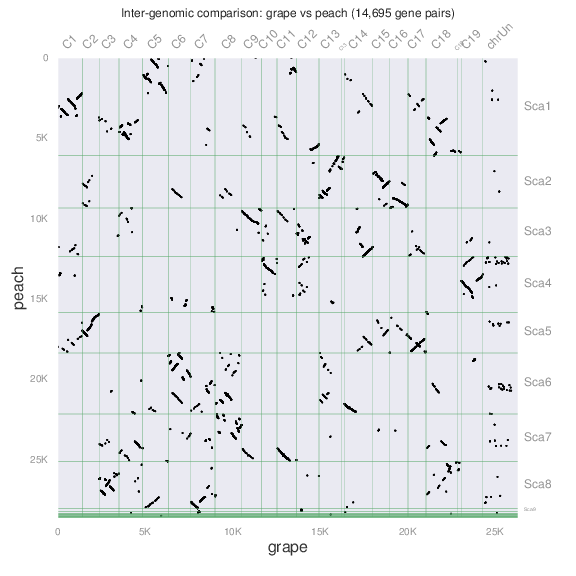

In [9]:
# display `grape.peachDEFAULT.pdf`
from wand.image import Image as WImage
img = WImage(filename="grape.peachDEFAULT.pdf")
img

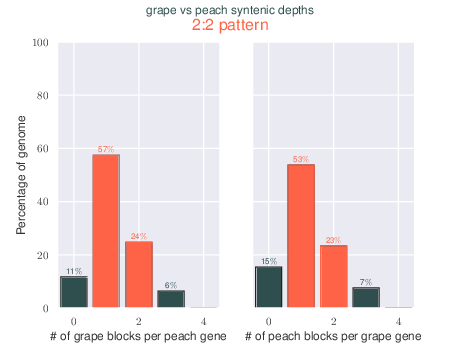

In [10]:
# display `grape.peach.depthDEFAULT.pdf`
from wand.image import Image as WImage
img = WImage(filename="grape.peach.depthDEFAULT.pdf")
img

### Run with setting to collect orthologs

Delete the old version of data, and re-run the analysis with `--cscore=.99` option set as discussed in the workflow example.

In [11]:
# remove default run
!rm grape.peach.last.filtered 
# Run to identify orthologs
!python2 -m jcvi.compara.catalog ortholog grape peach --cscore=.99
!python2 -m jcvi.graphics.dotplot grape.peach.anchors

23:44:24 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
23:44:24 [base] Load file `grape.bed`
23:44:24 [base] Load file `peach.bed`
23:44:25 [blastfilter] Load BLAST file `grape.peach.last` (total 403868 lines)
23:44:25 [base] Load file `grape.peach.last`
23:44:29 [blastfilter] running the cscore filter (cscore>=0.99) ..
23:44:30 [blastfilter] after filter (294217->14417) ..
23:44:30 [blastfilter] running the local dups filter (tandem_Nmax=10) ..
23:44:30 [blastfilter] after filter (14417->13886) ..
23:44:30 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
23:44:30 [base] Load file `grape.bed`
23:44:31 [base] Load file `peach.bed`
23:44:31 [base] Load file `grape.peach.last.filtered`
23:44:31 [synteny] A total of 13886 BLAST imported from `grape.peach.last.filtered`.
23:44:31 [synteny] Chaining distance = 20
23:44:32 [base] Load file `grape.peach.anchors`
A total of 11511 (NR:11497) anchors found in 369 clusters.
Stats: Min=4 Max=357 N=369 Mean=31.1951219512 SD=44.5398622113 

23:44:38 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
23:44:38 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
23:44:39 [__init__] backend agg version v2.2
23:44:39 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
23:44:39 [base] Load file `grape.bed`
23:44:40 [base] Load file `peach.bed`
23:44:40 [dotplot] Showing a random subset of 10000 data points (total 11511) for clarity.
23:44:41 [dotplot] xsize=26346 ysize=28701
23:44:41 [texmanager] serif font is not compatible with usetex.
23:44:41 [texmanager] serif font is not compatible with usetex.
23:44:41 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
23:44:41 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
23:44:41 [texmanager] cursive font is not compatible with usetex.
23:44:41 [texmanager] cursive font is not compatible with usetex.
23:44:41 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usep

23:44:42 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:44:42 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:44:42 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:44:42 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:44:42 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyphen', 'period', 'slash/zero', 'one', 'two', 'three/four', 'five', 'six', 'seven/eight', 'nine', 'colon', 'semicolon/less', 'equal', 'greater', 'q

23:44:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:44:43 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:44:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:44:43 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:44:44 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:44:44 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:44:44 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:44:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:44:46 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:44:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:44:46 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:46 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:44:46 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:44:46 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:44:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

23:44:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:44:48 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:44:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:44:48 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:44:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:44:48 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:44:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:44:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:44:50 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:44:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:44:50 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:44:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:44:50 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:44:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:44:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:44:52 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:44:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:44:52 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:44:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:44:52 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:44:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:44:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:44:54 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:44:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:44:54 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:44:55 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:44:55 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:44:55 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:44:57 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:44:57 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:44:57 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:44:57 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:44:57 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:44:57 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:44:57 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:44:57 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

23:44:59 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:44:59 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:44:59 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:44:59 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:44:59 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:44:59 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:44:59 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:45:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:01 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:01 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:01 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:45:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:03 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:03 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:03 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:45:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:05 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:05 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:06 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:06 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:06 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:45:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:08 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:08 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:08 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:45:08 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:08 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

23:45:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:10 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:10 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:10 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:45:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:12 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:12 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:12 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:45:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:14 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:45:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:16 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:16 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:16 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:17 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:45:18 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
23:45:18 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:19 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:19 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:19 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:45:19 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
23:45:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
23:45:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d60de6c333e8ed76aa45461974e51bf4.dvi
23:45:19 [dviread] Dvi._xxx: encount

23:45:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
23:45:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c0a03e6224343512cb1d881ae2e63f7e.dvi
23:45:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c0a03e6224343512cb1d881ae2e63f7e.dvi
23:45:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc

23:45:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/01b1a8745c928aef0f0017d5a08660ca.dvi
23:45:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/446d220c1f8ece0b686923be5c77740d.dvi
23:45:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/446d220c1f8ece0b686923be5c77740d.dvi
23:45:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e980099

23:45:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f7ee620ae4655b3c0e3508a2ba0251b1.dvi
23:45:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/2f047c73b1c0d8aced946a58e52db386.dvi
23:45:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/2f047c73b1c0d8aced946a58e52db386.dvi
23:45:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db

23:45:20 [backend_pdf] Embedding Type-1 font phvr8r from dvi.
23:45:20 [backend_pdf] Embedding TeX font phvr8r - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb', 'pdfname': <Name F1>, 'encodingfile': u'/usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc', 'dvifont': <matplotlib.dviread.DviFont object at 0x7f1aa76c68f0>, 'basefont': 'NimbusSanL-Regu', 'effects': {}}
23:45:20 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:45:20 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyp

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bfba22dd3fc4aa622441fcae42904be0.dvi
23:45:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bfba22dd3fc4aa622441fcae42904be0.dvi
23:45:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

23:45:21 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=5.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/b01af0bc9c57ce9190669c0353c8ff69.dvi
23:45:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/b01af0bc9c57ce9190669c0353c8ff69.dvi
23:45:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.4399

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/da424f824d7f8700124c08ce01d392b4.dvi
23:45:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/da424f824d7f8700124c08ce01d392b4.dvi
23:45:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

23:45:21 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/24b784b8839d6084e4f6e46a4a1251de.dvi
23:45:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:45:21 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [dviread] Dvi: /home/jovyan/.cache/matplotli

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
23:45:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:45:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.dvi
23:45:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.

23:45:24 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
23:45:24 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
23:45:24 [__init__] backend agg version v2.2
23:45:25 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
23:45:25 [base] Load file `grape.bed`
23:45:25 [base] Load file `peach.bed`
23:45:26 [dotplot] Showing a random subset of 10000 data points (total 11511) for clarity.
23:45:26 [dotplot] xsize=26346 ysize=28701
23:45:26 [texmanager] serif font is not compatible with usetex.
23:45:26 [texmanager] serif font is not compatible with usetex.
23:45:26 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
23:45:26 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
23:45:26 [texmanager] cursive font is not compatible with usetex.
23:45:26 [texmanager] cursive font is not compatible with usetex.
23:45:26 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usep

23:45:27 [dviread] Dvi._xxx: encountered special: Warning: missing glyph `Pi'
23:45:27 [dviread] Dvi._xxx: encountered special: Warning: missing glyph `Sigma'
23:45:27 [dviread] Dvi._xxx: encountered special: Warning: missing glyph `Upsilon'
23:45:27 [dviread] Dvi._xxx: encountered special: Warning: missing glyph `Phi'
23:45:27 [dviread] Dvi._xxx: encountered special: Warning: missing glyph `Psi'
23:45:27 [dviread] Dvi._xxx: encountered special: Warning: missing glyph `Omega'
23:45:27 [dviread] Dvi._xxx: encountered special: Warning: missing glyph `dotlessj'
23:45:27 [dviread] Dvi._xxx: encountered special: Warning: missing glyph `lslashslash'
23:45:27 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:27 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23

23:45:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:28 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:28 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, fon

23:45:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:30 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:30 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:30 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:45:32 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:32 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:32 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:32 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:32 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:32 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:32 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:45:34 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:34 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:34 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:45:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:34 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:34 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

23:45:36 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:36 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:36 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:36 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:36 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:36 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:45:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:38 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:38 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:39 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:45:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:41 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:41 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:41 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:45:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:43 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:43 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:43 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:45:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:45 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:45:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:45 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

23:45:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:47 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:47 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:47 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:45:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:49 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:49 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:49 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:45:51 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:51 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:51 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:51 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:51 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:51 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:45:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:53 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:53 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:54 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:45:55 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:55 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:56 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:45:56 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:45:56 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:45:56 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

23:45:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:58 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:45:58 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:45:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:45:58 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:45:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:46:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:46:00 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:46:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:46:00 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:46:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:46:00 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:46:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:46:02 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
23:46:02 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:46:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:46:02 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:46:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:46:02 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
23:46:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
23:46:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d60de6c333e8ed76aa45461974e51bf4.dvi
23:46:02 [dviread] Dvi._xxx: encount

23:46:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9c8f18e3423ef18da82023eef743a329.dvi
23:46:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
23:46:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/a42248172727c2331616ee4cab4d7741.dvi
23:46:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e980099

23:46:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/8600c828316760be68cbae2251604ecb.dvi
23:46:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/8600c828316760be68cbae2251604ecb.dvi
23:46:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
23:46:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e980099

23:46:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
23:46:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/b58b8e57b80fbcf07c4d31990bec772c.dvi
23:46:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
23:46:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/38bd6b3111e

23:46:04 [backend_pdf] Embedding Type-1 font phvr8r from dvi.
23:46:04 [backend_pdf] Embedding TeX font phvr8r - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb', 'pdfname': <Name F1>, 'encodingfile': u'/usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc', 'dvifont': <matplotlib.dviread.DviFont object at 0x7fbc22157530>, 'basefont': 'NimbusSanL-Regu', 'effects': {}}
23:46:04 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:46:04 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyp

23:46:04 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:04 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/3317da40e896b541b28c83ecd2421636.dvi
23:46:04 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:04 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:04 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:04 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:04 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/3317da40e896b541b28c83ecd2421636.dvi
23:46:04 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:04 [texmanager] fontconfig: sans

23:46:04 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:04 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:04 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:04 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/a42248172727c2331616ee4cab4d7741.dvi
23:46:04 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:04 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:04 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f932d0fe6cd9b0caff951151521a5c62.dvi
23:46:04 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:04 [texmanager] fontconfig: sans

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:04 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=6.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
23:46:04 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:04 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6776d592fe408de593e561fb9fca0f38.dvi
23:46:04 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:04 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:04 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:04 [texmanager] fontconfig: sans-serifcmrp

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:05 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:05 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/eefceecc2e13cd8f8eb36384e7f0e6e7.dvi
23:46:05 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:05 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:05 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:05 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:05 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/eefceecc2e13cd8f8eb36384e7f0e6e7.dvi
23:46:05 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:05 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
23:46:05 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:05 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/2f047c73b1c0d8aced946a58e52db386.dvi
23:46:05 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:05 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:05 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:05 [texmanager] fontconfig: sans-serifcmr

23:46:05 [base] Figure saved to `grape.peach.pdf` (720px x 720px)


In [12]:
# run depth script with ortholog result
!python2 -m jcvi.compara.synteny depth --histogram grape.peach.anchors

23:46:07 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
23:46:07 [base] Load file `grape.bed`
23:46:07 [base] Load file `peach.bed`
23:46:08 [base] Load file `grape.peach.anchors`
Genome grape depths:
Depth 0: 4,891 of 26,346 (18.6%)
Depth 1: 21,225 of 26,346 (80.6%)
Depth 2: 230 of 26,346 (0.9%)
Genome peach depths:
Depth 0: 4,535 of 28,701 (15.8%)
Depth 1: 23,889 of 28,701 (83.2%)
Depth 2: 277 of 28,701 (1.0%)
23:46:08 [__init__] $HOME=/home/jovyan
23:46:08 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
23:46:08 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
23:46:08 [__init__] matplotlib version 2.2.2
23:46:08 [__init__] interactive is False
23:46:08 [__init__] platform is linux2
23:46:08 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networ

23:46:08 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
23:46:08 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
23:46:08 [__init__] backend agg version v2.2
grape vs peach syntenic depths
1:1 pattern
23:46:09 [texmanager] serif font is not compatible with usetex.
23:46:09 [texmanager] serif font is not compatible with usetex.
23:46:09 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
23:46:09 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
23:46:09 [texmanager] cursive font is not compatible with usetex.
23:46:09 [texmanager] cursive font is not compatible with usetex.
23:46:09 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
23:46:09 [texmanager] monospace font is not compatible with usetex.
23:46:09 [texmanager] monospace font is not compatible with usetex.
23:46:09 [texmanager] family: monospace, font: Computer Modern Typewriter,

23:46:10 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
23:46:10 [dviread] find_tex_file(cmr10.pfb): ['kpsewhich', 'cmr10.pfb']
23:46:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr10.pfb
23:46:10 [backend_pdf] Assigning font /F1 = cmr10 (dvi)
23:46:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/2535ca9b9e0c1afa19fb59fef6948096.dvi
23:46:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bd106da34de3003ad5813726ddc54541.dvi
23:46:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:10 [dviread] Dvi:

23:46:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/fb35e783ba9ed3ad4bf2914b2c690ea1.dvi
23:46:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/22da34438677174d5367592d516b5377.dvi
23:46:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/94790cbadf0ebd4c3b69ac75f6fbd8fe.dvi
23:46:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:10 [dviread] find_tex_file(cmr8.tfm): ['kpsewhich', u'cmr8.tfm']
23:46:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmr8.tfm
23:46:11 [dviread] opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/public/cm

23:46:11 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/381425224300d4c9f2c591e9f6c90bb6.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:12 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
23:46:12 [texmanager] serif font is not compatible with usetex.
23:46:12 [texmanager] serif font is not compatible with usetex.
23:46:12 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
23:46:12 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
23:46:12 [texmanager] cursive font is not compatible with usetex.
23:46:12 [texmanager] cursive font is not compatible with usetex.
23:46:12 [texmanager] family: cursive, font: Zapf Chancery, info

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:12 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/22ccd1a7c5602f89b5211d1ff9a975cf.dvi
23:46:12 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:12 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c8b59d3b78e679074193ba6b4bf6c9f5.dvi
23:46:12 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.

23:46:12 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:46:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:12 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/5cc49740901d764cb48c7fccf41c715c.dvi
23:46:12 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:12 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/22ccd1a7c5602f89b5211d1ff9a975cf.dvi
23:46:12 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:12 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/2535ca9b9e0c1afa19fb59fef

23:46:13 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:46:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:13 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c76ca11b9aa418974c45f049822ed14b.dvi
23:46:13 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:13 [base] Figure saved to `grape.peach.depth.pdf`


Rename the resulting file so that it is clear which is which.

In [13]:
# rename `grape.peach.pdf` and `grape.peach.depth.pdf`
!mv grape.peach.pdf grape.peachORTH.pdf
!mv grape.peach.depth.pdf grape.peach.depthORTH.pdf

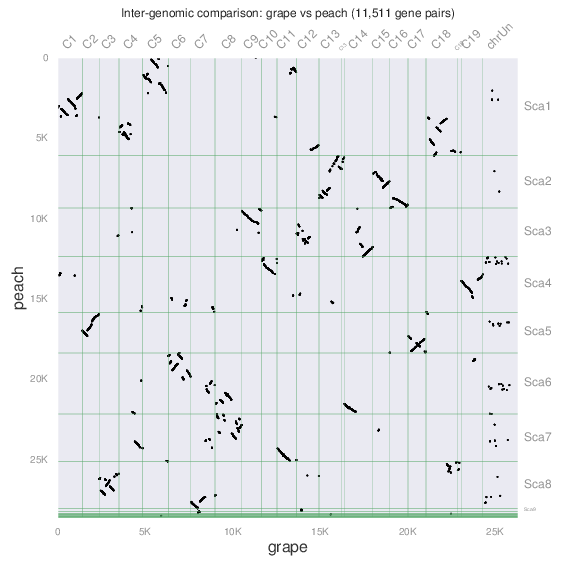

In [14]:
# display `grape.peachORTH.pdf` **ORTHOLOGS SETTING RESULT**
from wand.image import Image as WImage
img = WImage(filename="grape.peachORTH.pdf")
img

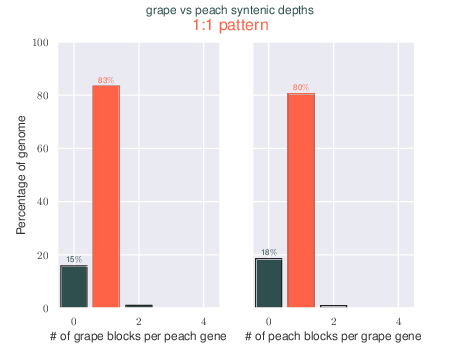

In [15]:
# display `grape.peach.depthORTH.pdf` **ORTHOLOGS SETTING RESULT**
from wand.image import Image as WImage
img = WImage(filename="grape.peach.depthORTH.pdf")
img

### Macrosynteny visualization

In [16]:
# Make seqids content match example code
seqids_string='''chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19
scaffold_1,scaffold_2,scaffold_3,scaffold_4,scaffold_5,scaffold_6,scaffold_7,scaffold_8'''
!echo "{seqids_string}">seqids

In [17]:
#Change layout to match example (see https://matplotlib.org/gallery/color/named_colors.html for colors)
layout_string='''# y, xstart, xend, rotation, color, label, va,  bed
 .6,     .1,    .8,       0,      coral, Grape, top, grape.bed
 .4,     .1,    .8,       0,      plum, Peach, top, peach.bed
# edges
e, 0, 1, grape.peach.anchors.simple'''
!echo "{layout_string}">layout

Leaving the color settings blank/default in the cases where that was how it was shown in the code in the example workflow resulted in inconsistent outcomes, probably because the examples were run at different times and not in order as they are here. Colors have been set to match the examples throughout this notebook to be reproducible. 

In [18]:
# Make `.simple` file
!python2 -m jcvi.compara.synteny screen --minspan=30 --simple grape.peach.anchors grape.peach.anchors.new 

23:46:21 [base] Load file `grape.peach.anchors`
23:46:21 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
23:46:21 [base] Load file `grape.bed`
23:46:22 [base] Load file `peach.bed`
23:46:22 [base] Load file `grape.peach.anchors.new`
23:46:22 [base] Load file `grape.bed`
23:46:23 [base] Load file `peach.bed`
23:46:23 [synteny] A total of 179 blocks written to `grape.peach.anchors.simple`.
23:46:23 [synteny] Before: 369 blocks, After: 179 blocks


In [19]:
!python2 -m jcvi.graphics.karyotype seqids layout

23:46:25 [__init__] $HOME=/home/jovyan
23:46:25 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
23:46:25 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
23:46:25 [__init__] matplotlib version 2.2.2
23:46:25 [__init__] interactive is False
23:46:25 [__init__] platform is linux2


23:46:25 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'jcvi.graphics.chromosome', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx.algorithms.community.scipy', 'email.socket', 'scipy.sparse.linalg.isolve.minres', 'networkx.algorithms.tree.coding', 'matplotlib', 'networkx.readwrite.itertools', 'jcvi.utils', 'jcvi.apps.signal', 'unittest.sys', 'numpy.core.umath', 'networkx.generators.degree_seq', 'email.MIMENonMultipart', 'networkx.algorithms.voronoi', 'networkx.algorithms.tree.mst', 'networkx.algorithms.components.biconn

23:46:25 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
23:46:25 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
23:46:25 [__init__] backend agg version v2.2
23:46:26 [base] Load file `layout`
23:46:26 [base] Load file `grape.bed`
23:46:27 [base] Load file `peach.bed`
23:46:28 [texmanager] serif font is not compatible with usetex.
23:46:28 [texmanager] serif font is not compatible with usetex.
23:46:28 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
23:46:28 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
23:46:28 [texmanager] cursive font is not compatible with usetex.
23:46:28 [texmanager] cursive font is not compatible with usetex.
23:46:28 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
23:46:28 [texmanager] monospace font is not compatible with usetex.
23:46:28 [texmanager] monospace font is not compatible with usetex.
23:46:

23:46:29 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
23:46:29 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:46:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:46:30 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:46:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:46:30 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
23:46:30 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:30 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
23:46:30 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:30 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:30 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:30 [texmanager] ['latex', '-interaction=no

23:46:30 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/28c55607265124db7b3ecf63382df0c1.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:46:31 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/e071f5f23437e665a84006648786ae70.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:46:31 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/6e0a75fbbd57688e16d7507cbe5ad959.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:46:31 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/91a3269948a6d840dd238bf65572097d.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:46:32 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/b6e1395f9713468af88c38e77283fc1f.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:46:32 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/4b647665e15f33a202cd68146e5d4d3a.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:46:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d964bc4d2788c7adde9ac440f37443e0.dvi
23:46:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
23:46:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/e071f5f23437e665a84006648786ae70.dvi
23:46:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e980099

23:46:33 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:46:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/86916282ad87a39d096e6649df8d6f46.dvi
23:46:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bd074d6e540d81593bbab8e6c2367132.dvi
23:46:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:33 [texmanager] fontconfig: sans-serif

23:46:33 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:46:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
23:46:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d964bc4d2788c7adde9ac440f37443e0.dvi
23:46:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:33 [texmanager] fontconfig: sans-serif

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9661ece9f1a7fc6d4351f402adfd14c7.dvi
23:46:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:34 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/2e7a7d4a76ba99175b9e9279ef5409d7.png', '/home/jovyan/.cache/matplotlib/tex.cache/9661ece9f1a7

23:46:35 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:46:35 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:35 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/b6e1395f9713468af88c38e77283fc1f.dvi
23:46:35 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:35 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:35 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c52e49c87a08ee0903b4f19f0c3a7def.dvi
23:46:35 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:35 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:35 [texmanager] fontconfig: sans-serif

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:35 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:35 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
23:46:35 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:35 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:35 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:35 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
23:46:35 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-s

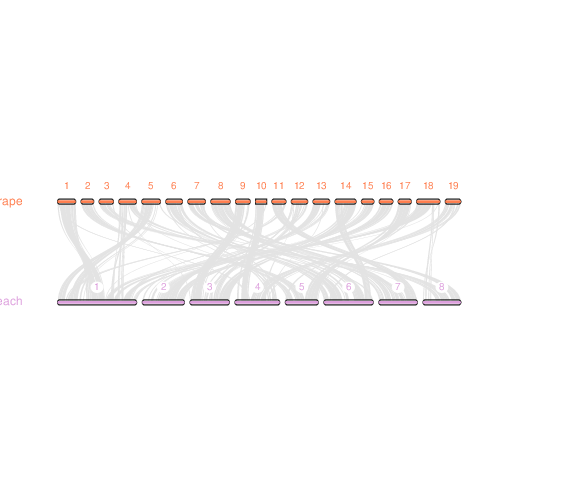

In [20]:
# display karyotype.pdf (rename it too so retained during next steps)
!mv karyotype.pdf karyotypeDEFAULT.pdf
from wand.image import Image as WImage
img = WImage(filename="karyotypeDEFAULT.pdf")
img

**Add highlight.**

In [21]:
# Not mentioned but clearly layout was edited to get different colors
layout_string='''# y, xstart, xend, rotation, color, label, va,  bed
 .6,     .1,    .8,       0,      gold, Grape, top, grape.bed
 .4,     .1,    .8,       0,      yellowgreen, Peach, top, peach.bed
# edges
e, 0, 1, grape.peach.anchors.simple'''
!echo "{layout_string}">layout

In [22]:
# Add `g*` to start of first line of grape.peach.anchors.simple 
!sed -i '1 s/^/g\*/' grape.peach.anchors.simple 
#see https://stackoverflow.com/a/12318347/8508004 &
# https://superuser.com/a/246841 for sed command to prepend inplace on same line and not above first line

In [23]:
!python2 -m jcvi.graphics.karyotype seqids layout

23:46:41 [__init__] $HOME=/home/jovyan
23:46:41 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
23:46:41 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
23:46:41 [__init__] matplotlib version 2.2.2
23:46:41 [__init__] interactive is False
23:46:41 [__init__] platform is linux2
23:46:41 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'jcvi.graphics.chromosome', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx

23:46:41 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
23:46:41 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
23:46:41 [__init__] backend agg version v2.2
23:46:41 [base] Load file `layout`
23:46:41 [base] Load file `grape.bed`
23:46:42 [base] Load file `peach.bed`
23:46:44 [texmanager] serif font is not compatible with usetex.
23:46:44 [texmanager] serif font is not compatible with usetex.
23:46:44 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
23:46:44 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
23:46:44 [texmanager] cursive font is not compatible with usetex.
23:46:44 [texmanager] cursive font is not compatible with usetex.
23:46:44 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
23:46:44 [texmanager] monospace font is not compatible with usetex.
23:46:44 [texmanager] monospace font is not compatible with usetex.
23:46:

23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/147e663fb3cc64f73d440168625dfd19.dvi
23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/147e663fb3cc64f73d440168625dfd19.dvi
23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db

23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c52e49c87a08ee0903b4f19f0c3a7def.dvi
23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c52e49c87a08ee0903b4f19f0c3a7def.dvi
23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e980099

23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d964bc4d2788c7adde9ac440f37443e0.dvi
23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d964bc4d2788c7adde9ac440f37443e0.dvi
23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:45 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/147e663fb3cc64f73d440168625dfd19.dvi
23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [texmanager] fontconfig: sans-serifcmr

23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9661ece9f1a7fc6d4351f402adfd14c7.dvi
23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9661ece9f1a7fc6d4351f402adfd14c7.dvi
23:46:45 [dviread] Dvi._xxx: encounter

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/147e663fb3cc64f73d440168625dfd19.dvi
23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:46:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/147e663fb3cc64f73d440168625dfd19.dvi
23:46:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-s

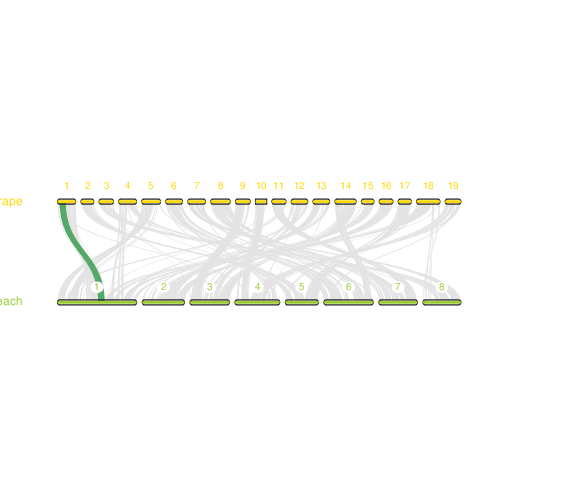

In [24]:
# display karyotype.pdf (rename it too so clear it is the second one)
!mv karyotype.pdf karyotypeHIGHLIGHT.pdf
from wand.image import Image as WImage
img = WImage(filename="karyotypeHIGHLIGHT.pdf")
img

### Macrosynteny getting fancy

This section will continue to work through the corresponding section in [the example workflow][1].

As with data above, the `Tcacao` data has been included already in this running Binder session for this section.

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [25]:
!python2 -m jcvi.formats.fasta format --sep="|" Tcacao_233_cds.fa.gz cacao.cds
!python2 -m jcvi.formats.gff bed --type=mRNA --key=Name Tcacao_233_gene.gff3.gz -o cacao.bed
!python2 -m jcvi.compara.catalog ortholog peach cacao --cscore=.99
!python2 -m jcvi.compara.synteny screen --minspan=30 --simple peach.cacao.anchors peach.cacao.anchors.new

23:46:53 [base] Load file `Tcacao_233_gene.gff3.gz`
23:47:24 [gff] Extracted 44404 features (type=mRNA id=Name)
23:47:26 [base] lastdb cacao cacao.cds
23:48:49 [base] lastal -u 0 -P 16 -i3G -f BlastTab cacao peach.cds >peach.cacao.last
23:53:12 [synteny] Assuming --qbed=peach.bed --sbed=cacao.bed
23:53:12 [base] Load file `peach.bed`
23:53:13 [base] Load file `cacao.bed`
23:53:14 [blastfilter] Load BLAST file `peach.cacao.last` (total 514735 lines)
23:53:14 [base] Load file `peach.cacao.last`
23:53:20 [blastfilter] running the cscore filter (cscore>=0.99) ..
23:53:20 [blastfilter] after filter (384811->21515) ..
23:53:20 [blastfilter] running the local dups filter (tandem_Nmax=10) ..
23:53:21 [blastfilter] after filter (21515->15817) ..
23:53:21 [synteny] Assuming --qbed=peach.bed --sbed=cacao.bed
23:53:21 [base] Load file `peach.bed`
23:53:22 [base] Load file `cacao.bed`
23:53:22 [base] Load file `peach.cacao.last.filtered`
23:53:22 [synteny] A total of 15817 BLAST imported from `peac

23:53:32 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
23:53:32 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
23:53:33 [__init__] backend agg version v2.2
23:53:33 [synteny] Assuming --qbed=peach.bed --sbed=cacao.bed
23:53:33 [base] Load file `peach.bed`
23:53:34 [base] Load file `cacao.bed`
23:53:35 [dotplot] Showing a random subset of 10000 data points (total 13604) for clarity.
23:53:35 [dotplot] xsize=28701 ysize=44404
23:53:35 [texmanager] serif font is not compatible with usetex.
23:53:35 [texmanager] serif font is not compatible with usetex.
23:53:35 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
23:53:35 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
23:53:35 [texmanager] cursive font is not compatible with usetex.
23:53:35 [texmanager] cursive font is not compatible with usetex.
23:53:35 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usep

23:53:36 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:36 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:36 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:53:36 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:53:36 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyphen', 'period', 'slash/zero', 'one', 'two', 'three/four', 'five', 'six', 'seven/eight', 'nine', 'colon', 'semicolon/less', 'equal', 'greater', 'q

23:53:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:38 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:53:38 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:53:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:38 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:53:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:40 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:53:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:53:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:53:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:53:40 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:53:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

23:53:42 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:42 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:53:43 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:53:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:43 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:53:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:45 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:53:45 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:53:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:45 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:53:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:47 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:53:47 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:53:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:47 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:53:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:49 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:53:49 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:53:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:49 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:53:51 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:51 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:51 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:53:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:53:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:53:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:53:51 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:53:51 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

23:53:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:54 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:53:54 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:53:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:54 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:53:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:56 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:53:56 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:53:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:56 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:53:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:58 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:53:58 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:53:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:53:58 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:53:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:54:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:54:00 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:54:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:54:00 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:54:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:54:01 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:54:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:54:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:54:03 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:54:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:54:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:54:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:03 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:54:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

23:54:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:54:05 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:54:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:54:05 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:54:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:54:05 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:54:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:54:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:54:07 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:54:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:54:07 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:54:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:54:07 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:54:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:54:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:54:09 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:54:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:54:09 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:54:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:54:10 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:54:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:54:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:54:12 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:54:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:54:12 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:54:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:54:12 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:54:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:54:13 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
23:54:14 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:54:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:54:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:54:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:54:14 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
23:54:14 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:14 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
23:54:14 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:14 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:14 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/da424f824d7f8700124c08ce01d392b4.dvi
23:54:14 [dviread] Dvi._xxx: encount

23:54:14 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/96628ec5d29ef1243f737e120d0a4cd5.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:54:15 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:15 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:15 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
23:54:15 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:15 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:15 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
23:54:15 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:15 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:15 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.dvi
23:54:15 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:15 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e980099

23:54:15 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/203da42471cedbb39c25d28a10edfe9d.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:54:15 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/ef2167ebac9182da156f460b7e532408.tex']
23:54:15 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/ef2167ebac9182da156f460b7e532408.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/tex

23:54:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:17 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/da424f824d7f8700124c08ce01d392b4.dvi
23:54:17 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:54:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:17 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/351114413d87206b8f58f9fb6fa4bff8.dvi
23:54:17 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:17 [texmanager] fontconfig: sans

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:54:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:17 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/da424f824d7f8700124c08ce01d392b4.dvi
23:54:17 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:17 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/da424f824d7f8700124c08ce01d392b4.dvi
23:54:17 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-s

23:54:17 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:54:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:17 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/96628ec5d29ef1243f737e120d0a4cd5.dvi
23:54:17 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:54:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:17 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/3a617ea86ce32b80af54ad6d37113f3a.dvi
23:54:17 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:17 [texmanager] fontconfig: sans-serif

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:54:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:18 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.dvi
23:54:18 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:54:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:18 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d0b209618f8b4e9373c4de3685ab2cd6.dvi
23:54:18 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.

23:54:18 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:54:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:18 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/e562e291d001f4abc0029f5f96f4d01d.dvi
23:54:18 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:18 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/c0f986facd590ed6b9fdb17aeeaa9d68.png', '/home/jovyan/.cache/matplotlib/tex.cache/f4dd946bc31a5682c85010bfba97691c.dvi']
23:54:18 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:54:18 [texmanager] fontconfi

In [26]:
#Change layout to match example (see https://matplotlib.org/gallery/color/named_colors.html for colors)
layout_string='''# y, xstart, xend, rotation, color, label, va,  bed
 .7,     .1,    .8,      15,      violet, Grape, top, grape.bed
 .5,     .1,    .8,       0,      steelblue, Peach, top, peach.bed
 .3,     .1,    .8,     -15,      silver, Cacao, bottom, cacao.bed
# edges
e, 0, 1, grape.peach.anchors.simple
e, 1, 2, peach.cacao.anchors.simple'''
!echo "{layout_string}">layout

In [27]:
#Change seqids to match example
seqids_string='''chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19
scaffold_1,scaffold_2,scaffold_3,scaffold_4,scaffold_5,scaffold_6,scaffold_7,scaffold_8
scaffold_1,scaffold_2,scaffold_3,scaffold_4,scaffold_5,scaffold_6,scaffold_7,scaffold_8,scaffold_9,scaffold_10r'''
!echo "{seqids_string}">seqids

In [28]:
!python2 -m jcvi.graphics.karyotype seqids layout

23:54:27 [__init__] $HOME=/home/jovyan
23:54:27 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
23:54:27 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
23:54:27 [__init__] matplotlib version 2.2.2
23:54:27 [__init__] interactive is False
23:54:27 [__init__] platform is linux2
23:54:27 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'jcvi.graphics.chromosome', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx

23:54:27 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
23:54:27 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
23:54:27 [__init__] backend agg version v2.2
23:54:28 [base] Load file `layout`
23:54:28 [base] Load file `grape.bed`
23:54:29 [base] Load file `peach.bed`
23:54:30 [base] Load file `cacao.bed`
23:54:32 [texmanager] serif font is not compatible with usetex.
23:54:32 [texmanager] serif font is not compatible with usetex.
23:54:32 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
23:54:32 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
23:54:32 [texmanager] cursive font is not compatible with usetex.
23:54:32 [texmanager] cursive font is not compatible with usetex.
23:54:32 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
23:54:32 [texmanager] monospace font is not compatible with usetex.
23:54:32 [texmanager] monospace font

23:54:33 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/fa3303735ffa26fea8a19a4d597d03b0.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:54:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/061eb7581678ad6ad393e68a2abd2869.dvi
23:54:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
23:54:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/91a3269948a6d840dd238bf65572097d.dvi
23:54:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e980099

23:54:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/126f6d0ea8ce67416c1189ca82f75f83.dvi
23:54:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/126f6d0ea8ce67416c1189ca82f75f83.dvi
23:54:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
23:54:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/147e663fb3c

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:54:34 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
23:54:34 [texmanager] serif font is not compatible with usetex.
23:54:34 [texmanager] serif font is not compatible with usetex.
23:54:34 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
23:54:34 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
23:54:34 [texmanager] cursive font is not compatible with usetex.
23:54:34 [texmanager] cursive font is not compatible with usetex.
23:54:34 [texmanager] family: cursive, font: Zapf Chancery, info

23:54:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/916c6639f11b2f601035ad5d50405405.dvi
23:54:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:54:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/28c55607265124db7b3ecf63382df0c1.dvi
23:54:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:34 [dviread] Dvi: /home/jovyan/.

23:54:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:54:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/71dec7e1e9f3d23ad69f99b5e438cae2.dvi
23:54:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/71dec7e1e9f3d23ad69f99b5e438cae2.dvi
23:54:34 [dviread] Dvi._xxx: encounter

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:54:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/916c6639f11b2f601035ad5d50405405.dvi
23:54:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/916c6639f11b2f601035ad5d50405405.dvi
23:54:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-s

23:54:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
23:54:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
23:54:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:54:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d964bc4d2788c7adde9ac440f37443e0.dvi
23:54:34 [dviread] Dvi._xx

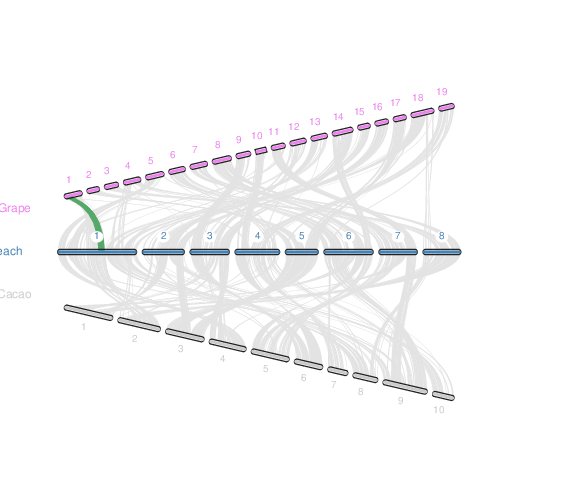

In [29]:
# display karyotype.pdf (rename it too so clear it is the three genome one)
!mv karyotype.pdf karyotypeTHREE.pdf
from wand.image import Image as WImage
img = WImage(filename="karyotypeTHREE.pdf")
img

### Microsynteny visualization

This section will continue to work through the corresponding section in [the example workflow][1].

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [30]:
!python2 -m jcvi.compara.synteny mcscan grape.bed grape.peach.lifted.anchors --iter=1 -o grape.peach.i1.blocks

23:54:38 [base] Load file `grape.bed`
23:54:38 [base] Load file `grape.peach.lifted.anchors`
Chain started: 369 blocks
Chain 0: score=15493 23 blocks remained..
23:54:41 [synteny] MCscan blocks written to `grape.peach.i1.blocks`.


In [31]:
!head -50 grape.peach.i1.blocks > blocks

In [32]:
#Make blocks.layout to match example
blocks_layout_string='''# x,   y, rotation,   ha,     va,   color, ratio,            label
0.5, 0.6,        0, left, center,       m,     1,       grape Chr1
0.5, 0.4,        0, left, center, #fc8d62,     1, peach scaffold_1
# edges
e, 0, 1'''
!echo "{blocks_layout_string}">blocks.layout

In [33]:
!cat grape.bed peach.bed > grape_peach.bed
!python2 -m jcvi.graphics.synteny blocks grape_peach.bed blocks.layout

23:54:46 [__init__] $HOME=/home/jovyan
23:54:46 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
23:54:46 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
23:54:46 [__init__] matplotlib version 2.2.2
23:54:46 [__init__] interactive is False
23:54:46 [__init__] platform is linux2
23:54:46 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx.algorithms.community.scipy'

23:54:46 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
23:54:46 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
23:54:46 [__init__] backend agg version v2.2
23:54:46 [base] Load file `grape_peach.bed`
23:54:47 [base] Load file `blocks`
23:54:47 [base] Load file `blocks.layout`
Column 0: GSVIVT01012261001 - GSVIVT01012208001 (chr1:10731-562819)
  chr1 .. 50 (50) features .. +
Column 1: ppa015711m - ppa005716m (scaffold_1:27681744-28110947)
  scaffold_1 .. 81 (39) features .. -
23:54:48 [texmanager] serif font is not compatible with usetex.
23:54:48 [texmanager] serif font is not compatible with usetex.
23:54:48 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
23:54:48 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
23:54:48 [texmanager] cursive font is not compatible with usetex.
23:54:48 [texmanager] cursive font is not compatible with usetex.
23:54:48 [texmanager] family:

23:54:49 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
23:54:49 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:54:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:54:49 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:54:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:54:49 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
23:54:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:49 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
23:54:49 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:49 [texmanager] ['latex', '-interaction=no

23:54:50 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:50 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6bb0c8169b97d5c95feadb9edbf95899.dvi
23:54:50 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:50 [backend_pdf] Embedding Type-1 font phvr8r from dvi.
23:54:50 [backend_pdf] Embedding TeX font phvr8r - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb', 'pdfname': <Name F1>, 'encodingfile': u'/usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc', 'dvifont': <matplotlib.dviread.DviFont object at 0x7f4b3c1ad230>, 'basefont': 'NimbusSanL-Regu', 'effects': {}}
23:54:50 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:54:50 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotless

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:54:50 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
23:54:50 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:50 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7e2e1c555f94d2f99720b3c07f7b116b.dvi
23:54:50 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:54:50 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:50 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:54:50 [texmanager] fontconfig: sans-serifcmr

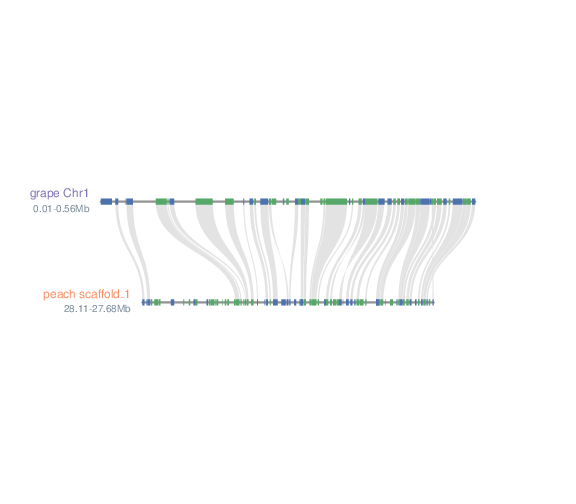

In [34]:
# display blocks.pdf (rename it too so it remains when next section run)
!mv blocks.pdf blocksVIS.pdf
from wand.image import Image as WImage
img = WImage(filename="blocksVIS.pdf")
img

### Microsynteny getting fancy

This section will continue to work through the corresponding section in [the example workflow][1].

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [35]:
!python2 -m jcvi.compara.catalog ortholog grape cacao --cscore=.99
!python2 -m jcvi.compara.synteny mcscan grape.bed grape.cacao.lifted.anchors --iter=1 -o grape.cacao.i1.blocks

23:54:54 [cbook] File `cacao.prj` exists. Computation skipped.
23:54:54 [base] lastal -u 0 -P 16 -i3G -f BlastTab cacao grape.cds >grape.cacao.last
23:58:34 [synteny] Assuming --qbed=grape.bed --sbed=cacao.bed
23:58:34 [base] Load file `grape.bed`
23:58:35 [base] Load file `cacao.bed`
23:58:36 [blastfilter] Load BLAST file `grape.cacao.last` (total 499456 lines)
23:58:36 [base] Load file `grape.cacao.last`
23:58:41 [blastfilter] running the cscore filter (cscore>=0.99) ..
23:58:42 [blastfilter] after filter (359783->19185) ..
23:58:42 [blastfilter] running the local dups filter (tandem_Nmax=10) ..
23:58:42 [blastfilter] after filter (19185->14313) ..
23:58:43 [synteny] Assuming --qbed=grape.bed --sbed=cacao.bed
23:58:43 [base] Load file `grape.bed`
23:58:43 [base] Load file `cacao.bed`
23:58:44 [base] Load file `grape.cacao.last.filtered`
23:58:44 [synteny] A total of 14313 BLAST imported from `grape.cacao.last.filtered`.
23:58:44 [synteny] Chaining distance = 20
23:58:44 [base] Load f

23:58:54 [__init__] backend agg version v2.2
23:58:54 [synteny] Assuming --qbed=grape.bed --sbed=cacao.bed
23:58:54 [base] Load file `grape.bed`
23:58:55 [base] Load file `cacao.bed`
23:58:56 [dotplot] Showing a random subset of 10000 data points (total 11914) for clarity.
23:58:56 [dotplot] xsize=26346 ysize=44404
23:58:56 [texmanager] serif font is not compatible with usetex.
23:58:56 [texmanager] serif font is not compatible with usetex.
23:58:56 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
23:58:56 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
23:58:56 [texmanager] cursive font is not compatible with usetex.
23:58:56 [texmanager] cursive font is not compatible with usetex.
23:58:56 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
23:58:56 [texmanager] monospace font is not compatible with usetex.
23:58:56 [texmanager] monospace font is not compatible with usetex.
23:58:

23:58:57 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:58:57 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:58:57 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:58:57 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:58:57 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyphen', 'period', 'slash/zero', 'one', 'two', 'three/four', 'five', 'six', 'seven/eight', 'nine', 'colon', 'semicolon/less', 'equal', 'greater', 'q

23:58:59 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:58:59 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:58:59 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:58:59 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:58:59 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:58:59 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:58:59 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:59:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:01 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:59:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:59:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:01 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

23:59:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:03 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:59:03 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:03 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:59:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:05 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:59:05 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:05 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:59:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:07 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:59:08 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:08 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:59:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:10 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:59:10 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:10 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:59:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:12 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:59:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:12 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:59:12 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:12 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

23:59:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:59:14 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:59:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:16 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:59:16 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:16 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:59:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:18 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:59:18 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:18 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:19 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:59:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:20 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:59:21 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:21 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:59:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:23 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:59:23 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:23 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
23:59:23 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:23 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

23:59:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:25 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:59:25 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:25 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:59:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:27 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:59:27 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:27 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:59:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:29 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:59:29 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:29 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

23:59:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:31 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
23:59:31 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:31 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

23:59:33 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
23:59:33 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
23:59:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
23:59:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
23:59:34 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:59:34 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
23:59:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
23:59:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d60de6c333e8ed76aa45461974e51bf4.dvi
23:59:34 [dviread] Dvi._xxx: encount

23:59:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6776d592fe408de593e561fb9fca0f38.dvi
23:59:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6776d592fe408de593e561fb9fca0f38.dvi
23:59:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
23:59:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/01274c07fa9

23:59:34 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/a3aedbde85b89b45c814513842300efb.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

23:59:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/38bd6b3111ec14e1e7f734848ecb7888.dvi
23:59:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.dvi
23:59:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/203da42471cedbb39c25d28a10edfe9d.dvi
23:59:34 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:34 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:34 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/e562e291d00

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d264bf00a2e9e3c0e8a2cdb1e872a584.dvi
23:59:36 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d264bf00a2e9e3c0e8a2cdb1e872a584.dvi
23:59:36 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9c8f18e3423ef18da82023eef743a329.dvi
23:59:36 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9c8f18e3423ef18da82023eef743a329.dvi
23:59:36 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/325783f52f029ceeeb14bd43fb65f9fb.dvi
23:59:36 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/325783f52f029ceeeb14bd43fb65f9fb.dvi
23:59:36 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/8600c828316760be68cbae2251604ecb.dvi
23:59:36 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/8600c828316760be68cbae2251604ecb.dvi
23:59:36 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

23:59:36 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

23:59:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:36 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/a3aedbde85b89b45c814513842300efb.dvi
23:59:36 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:59:37 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
23:59:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:37 [dviread] Dvi: /home/jovyan/.cache/matplotli

23:59:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:37 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/2f047c73b1c0d8aced946a58e52db386.dvi
23:59:37 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:59:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:37 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
23:59:37 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

23:59:37 [base] Figure saved to `grape.cacao.pdf` (720px x 720px)
23:59:39 [base] Load file `grape.bed`
23:59:40 [base] Load file `grape.cacao.lifted.anchors`
Chain started: 409 blocks
Chain 0: score=15766 23 blocks remained..
23:59:43 [synteny] MCscan blocks written to `grape.cacao.i1.blocks`.


In [36]:
!python2 -m jcvi.formats.base join grape.peach.i1.blocks grape.cacao.i1.blocks --noheader | cut -f1,2,4,6 > grape.blocks
!head -50 grape.blocks > blocks2

23:59:44 [base] Load file `grape.peach.i1.blocks`
23:59:44 [base] Imported 26346 records from `grape.peach.i1.blocks`.
23:59:44 [base] Load file `grape.cacao.i1.blocks`
23:59:44 [base] Imported 26346 records from `grape.cacao.i1.blocks`.


In [37]:
#Make blocks2.layout to match example
blocks2_layout_string='''# x,   y, rotation,     ha,     va, color, ratio,            label
0.5, 0.6,        0, center,    top,      ,     1,       grape Chr1
0.3, 0.4,        0, center, bottom,      ,    .5, peach scaffold_1
0.7, 0.4,        0, center, bottom,      ,    .5, cacao scaffold_2
# edges
e, 0, 1
e, 0, 2'''
!echo "{blocks2_layout_string}">blocks2.layout

In [38]:
!cat grape.bed peach.bed cacao.bed > grape_peach_cacao.bed
!python2 -m jcvi.graphics.synteny blocks2 grape_peach_cacao.bed blocks2.layout

23:59:49 [__init__] $HOME=/home/jovyan
23:59:49 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
23:59:49 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
23:59:49 [__init__] matplotlib version 2.2.2
23:59:49 [__init__] interactive is False
23:59:49 [__init__] platform is linux2
23:59:49 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx.algorithms.community.scipy'

23:59:49 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
23:59:49 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
23:59:49 [__init__] backend agg version v2.2
23:59:50 [base] Load file `grape_peach_cacao.bed`
23:59:52 [base] Load file `blocks2`
23:59:52 [base] Load file `blocks2.layout`
Column 0: GSVIVT01012261001 - GSVIVT01012208001 (chr1:10731-562819)
  chr1 .. 50 (50) features .. +
Column 1: ppa015711m - ppa005716m (scaffold_1:27681744-28110947)
  scaffold_1 .. 138 (39) features .. -
Column 2: Thecc1EG011472t1 - Thecc1EG011564t1 (scaffold_2:40337967-40742182)
  scaffold_2 .. 104 (40) features .. +
23:59:53 [texmanager] serif font is not compatible with usetex.
23:59:53 [texmanager] serif font is not compatible with usetex.
23:59:53 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
23:59:53 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
23:59:53 [texmanager] cursive font i

23:59:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:59:54 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
23:59:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
23:59:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7e2e1c555f94d2f99720b3c07f7b116b.dvi
23:59:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7e2e1c555f94d2f99720b3c07f7b116b.dvi
23:59:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:54 [

23:59:54 [backend_pdf] Embedding Type-1 font phvr8r from dvi.
23:59:54 [backend_pdf] Embedding TeX font phvr8r - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb', 'pdfname': <Name F1>, 'encodingfile': u'/usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc', 'dvifont': <matplotlib.dviread.DviFont object at 0x7f313fdf3230>, 'basefont': 'NimbusSanL-Regu', 'effects': {}}
23:59:54 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
23:59:54 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyp

23:59:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7e2e1c555f94d2f99720b3c07f7b116b.dvi
23:59:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
23:59:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/3489e11d13be253aa129baf740c55e8a.dvi
23:59:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
23:59:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
23:59:54 [texmanager] fontconfig: sans

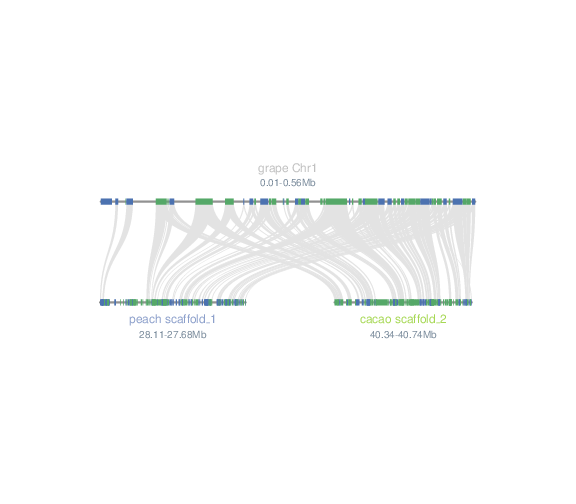

In [39]:
# display blocks2.pdf 
from wand.image import Image as WImage
img = WImage(filename="blocks2.pdf")
img

That concludes the official example workflow presently available. 

I am going to add one more section because I overlooked it when learning about jcvi/MCscan, and so I thought others might appreciate it.

## Beyond the example workflow:

### Learning about the actions available and command usage

The [jcvi repo at Github at the bottom of the 'installation' section](https://github.com/tanghaibao/jcvi#installation) highlights a very useful ability of the jcvi/MCscan software. You can get a list of available actions and then drill down to get the usage of those commands.

For example, the `jcvi.formats.gff.py` script that gets used in the example workflow to convert the `gff3` file to `.bed` format is able to do much more than that. To see the actions available just call any jcvi script with no additional arguments.

In [40]:
!python2 -m jcvi.formats.gff

Usage:
    python -m jcvi.formats.gff ACTION


Available ACTIONs:
        addparent | Merge sister features and infer their parent
              bed | Parse gff and produce bed file for particular feature type
            bed12 | Produce bed12 file for coding features
            chain | Fill in parent features by chaining children
         children | Find all children that belongs to the same parent
          cluster | Cluster transcripts based on shared splicing structure
          extract | Extract contig or features from gff file
           filter | Filter the gff file based on Identity and Coverage
    fixboundaries | Fix boundaries of parent features by range chaining child features
      fixpartials | Fix 5/3 prime partial transcripts, locate nearest in-frame start/stop
           format | Format the gff file, change seqid, etc.
          frombed | Convert from bed format to gff3
          fromgtf | Convert gtf to gff3 format
         fromsoap | Convert from soap format to gff3


Then the individual actions can be used to reveal the usage of them complete with necessary inputs and options. Here are two examples with actions from the `jcvi.formats.gff.py` script.

In [41]:
!python2 -m jcvi.formats.gff bed

Usage: 
    gff.py bed gff_file [--options]

    Parses the start, stop locations of the selected features out of GFF and
    generate a bed file
    

Options:
  -h, --help            Show this help message and exit
  --type=TYPE           Feature type to extract, use comma for multiple
                        [default: gene]
  --key=KEY             Key in the attributes to extract [default: ID]
  --source=SOURCE       Source to extract from, use comma for multiple
                        [default: none]
  --span                Use feature span in the score column [default: False]
  --score_attrib=SCORE_ATTRIB
                        Attribute whose value is to be used as score in
                        `bedline` [default: False]
  --append_source       Append GFF source name to extracted key value
                        [default: False]
  --append_ftype        Append GFF feature type to extracted key value
                        [default: False]
  --nosort              Do not sort

In [42]:
!python2 -m jcvi.formats.gff load

Usage: 
    gff.py load gff_file fasta_file [--options]

    Parses the selected features out of GFF, with subfeatures concatenated.
    For example, to get the CDS sequences, do this:
    $ gff.py load athaliana.gff athaliana.fa --parents mRNA --children CDS

    To get 500bp upstream of a genes Transcription Start Site (TSS), do this:
    $ gff.py load athaliana.gff athaliana.fa --feature=upstream:TSS:500

    Switch TSS with TrSS for Translation Start Site.
    

Options:
  -h, --help            Show this help message and exit
  --parents=PARENTS     List of features to extract, use comma to separate
                        (e.g.'gene,mRNA') [default: mRNA]
  --children=CHILDREN   List of features to extract, use comma to separate
                        (e.g.'five_prime_UTR,CDS,three_prime_UTR') [default:
                        CDS]
  --feature=FEATURE     Feature type to extract. e.g. `--feature=CDS` or
                        `--feature=upstream:TSS:500` [default: none]
  --id_a

The `load` command available via the `jcvi.formats.gff.py` script wasn't used in the example workflow; however, it is handy if you need to collect the DNA encoding genes for use in preparing for running a comparison with MCscan.

Additionally, as illustrated by the next two commands, the command illustrated above can be shortened for additional insight into the module and available scripts without need to go to Github and peruse the code hierarchy.

In [43]:
!python2 -m jcvi

Usage:
    python -m jcvi.MODULE


Available MODULEs:
    algorithms | Implementations of several key algorithms, such as: TSP, Graph, SuperMap, Linear Programming, ML, etc. used by other modules
    annotation | Collection of scripts to run gene finders, execute annotation pipelines, perform QC checks and generate summary statistics
          apps | Miscellany of wrapper scripts for command-line bioinformatics tools, public data downloaders and other generic routines
      assembly | Assemblage of genome-assembly related scripts: ALLMAPS algorithm, scaffolding, k-mer analysis, QC, tool wrappers, etc. 
       compara | Cluster of comparative genomics analysis methods: SynFind and QUOTA-ALIGN algorithms, synteny analysis, QC, etc. 
       formats | Array of data parsers for bioinformatics file formats, such as: GFF3, BED, SAM/BAM, VCF, PSL, AGP, FASTA/FASTQ, BLAST, etc. 
      graphics | Suite of visualization tools for dot-plots, histograms, karytotypes, macro-/micro-synteny plots, see

In [44]:
!python2 -m jcvi.formats

Usage:
    python -m jcvi.formats.SCRIPT


Available SCRIPTs:
        ace | Parse ace format files
        agp | Genbank AGP file format, see spec here
       base | No docstring found
        bed | Classes to handle the .bed files
      blast | Parses tabular BLAST -m8 (-format 6 in BLAST+) format
       btab | Btab format, used by BLAST and NUCMER, found spec here
        cdt | Convert the result from Eisen's CLUSTER program: data.gtr and data.cdt into NEWICK format
      chain | Create the UCSC chain file which is needed to lift over from one coordinate
     contig | TIGR contig format, see spec
     coords | Parses JCVI software NUCMER (http://mummer.sourceforge.net/manual/)
      excel | Read and write EXCEL file
      fasta | Wrapper for biopython Fasta, add option to parse sequence headers
      fastq | Processing fastq files
        fpc | Parser for FPC physical map file, writes a tabular file to stdout
    genbank | Genbank record operations based on biopython Bio.SeqIO
      

## Where to next?

Hopefully, the above examples have demonstrated you now have an environment that you can run MCScan and generate some useful results. Your next step would be to add your data and repeat. You can get to the Jupyter Dashboard by clicking the the Jupyter logo in the upper left corner of this notebook. There you can upload files from your computer using a typical GUI file handling interface. Or, you can use the command line to retrieve files.

Note that you can also use that same Jupyter Dashboard, to launch new notebooks to start working with your own data in a fresh notebook in the same session as you ran the examples above.

Remember that if you make any useful files to get them ASAP as these Binder-associated instances are temporary.